In [8]:
import sys
import matplotlib.pyplot as plt
import pandas as pd

Different functions will be used to plot presence of probability of heart disease for each feature. 

In [9]:
def plotRelationshipBinary(data, x, y):
    x_no_y_yes = data.value_counts([x, y])[0,1]
    x_yes_y_yes = data.value_counts([x, y])[1,1]
    x_yes_total = data[x].value_counts()[1]
    x_no_total = data[x].value_counts()[0]

    x_no_y_yes_perc = round(x_no_y_yes / x_no_total * 100, 2)
    x_yes_y_yes_perc = round(x_yes_y_yes / x_yes_total * 100, 2)

    x_axis_list = ['false','true']
    y_axis_list = [x_no_y_yes_perc, x_yes_y_yes_perc]

    plt.bar(x_axis_list, y_axis_list)
    plt.ylabel(f'{y} %')
    plt.xlabel(x)
    plt.show()

def getPlotDataframe(data, x, y, x_vals_list):
    plot_df = pd.DataFrame(list(zip(x_vals_list, [-1] * len(x_vals_list))),
               columns =['x', 'y'])

    for index, row in plot_df.iterrows():
        x_inRange_y_yes = data.value_counts([x, y])[row['x'],1]
        x_inRange_total = data[x].value_counts()[row['x']]
        plot_df.loc[index, 'y'] = round(x_inRange_y_yes / x_inRange_total * 100, 2)
    
    return plot_df

def getPlotDataframeBlocks(data, x, y, x_vals_list, block_cnt):
    data = pd.DataFrame(data)

    max_value = max(x_vals_list)
    min_value = min(x_vals_list)

    value_range = max_value - min_value
    step_size = value_range / (block_cnt - 1)

    cut_off_list = []
    cut_off_list.append(int(-sys.maxsize - 1))
    cut_off_list.append(int(min_value))

    for i in range(2, block_cnt - 1):
        cut_off_list.append(round(cut_off_list[i - 1] + (step_size), 2))
    cut_off_list.append(sys.maxsize)

    y_yes_total = data.where(data[y] == 1)
    x_InRange_total = data[x].value_counts(bins=cut_off_list, sort=False)
    x_InRange_y_yes = y_yes_total[x].value_counts(bins=cut_off_list, sort=False)

    x_y_relations = round(x_InRange_y_yes / x_InRange_total * 100, 2).tolist()
    cut_off_list.pop(0)
    cut_off_list[-1] = cut_off_list[-2] + step_size

    return pd.DataFrame(zip(cut_off_list, x_y_relations), columns =['x', 'y'])
    

def plotRelationshipContinious(data, x, y, block_cnt):
    
    data = pd.DataFrame(data)

    x_vals_list = data[x].unique()
    x_vals_list.sort()
    x_vals_list = x_vals_list.tolist()

    x_vals_list_len = len(x_vals_list)

    if x_vals_list_len > block_cnt:
        plot_df = getPlotDataframeBlocks(data, x, y, x_vals_list, block_cnt)

    else:
        plot_df = getPlotDataframe(data, x, y, x_vals_list)

    plt.bar(plot_df.x, plot_df.y, width=(max(plot_df.x) / len(plot_df.x) * 0.8))
    plt.ylabel(f'{y} %')
    plt.xlabel(x)
    plt.show()

In [10]:
df = pd.read_csv( r'../data/2015_cleaned_droppedNAN.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,SexIsMale,AgeGroup
0,0.0,1.0,1.0,0.320255,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667
1,0.0,0.0,0.0,0.148641,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500000
2,0.0,1.0,1.0,0.183896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667
3,0.0,1.0,0.0,0.164904,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.833333
4,0.0,1.0,1.0,0.134994,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.833333


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292745 entries, 0 to 292744
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  292745 non-null  float64
 1   HighBP                292745 non-null  float64
 2   HighChol              292745 non-null  float64
 3   BMI                   292745 non-null  float64
 4   Smoker                292745 non-null  float64
 5   Diabetes              292745 non-null  float64
 6   PhysActivity          292745 non-null  float64
 7   Fruits                292745 non-null  float64
 8   Veggies               292745 non-null  float64
 9   HvyAlcoholConsump     292745 non-null  float64
 10  SexIsMale             292745 non-null  float64
 11  AgeGroup              292745 non-null  float64
dtypes: float64(12)
memory usage: 26.8 MB


# Plot for binary features

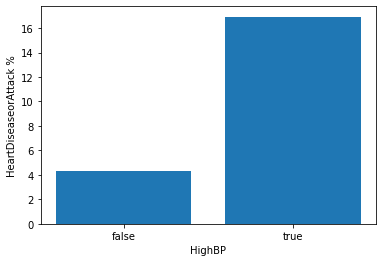

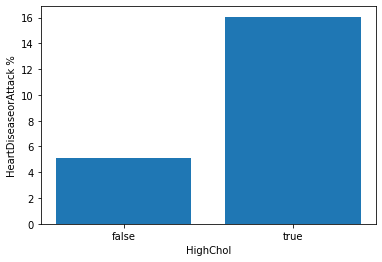

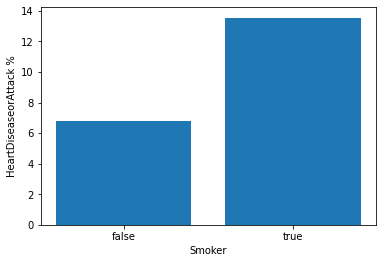

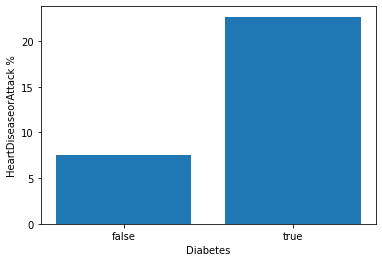

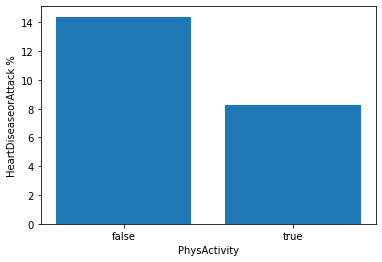

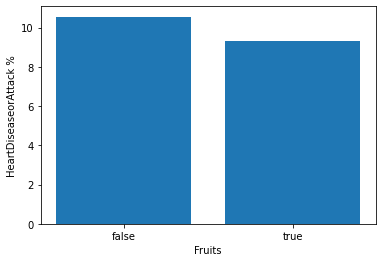

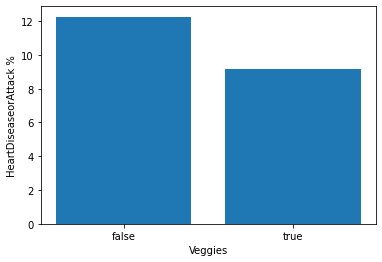

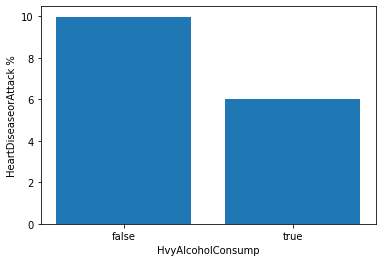

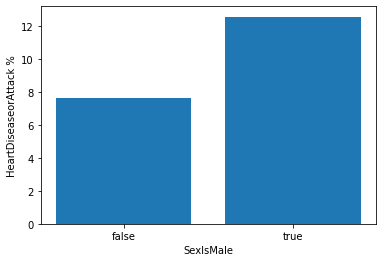

In [12]:
plotRelationshipBinary(df, 'HighBP', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'HighChol', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'Smoker', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'Diabetes', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'PhysActivity', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'Fruits', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'Veggies', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'HvyAlcoholConsump', 'HeartDiseaseorAttack')
plotRelationshipBinary(df, 'SexIsMale', 'HeartDiseaseorAttack')

# Plot for continues features

Since the dataset is already scaled the values dont represent the actual values.

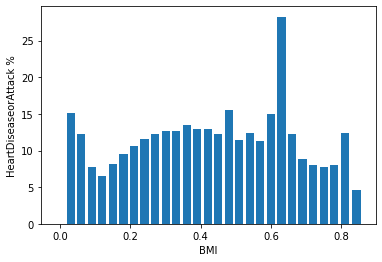

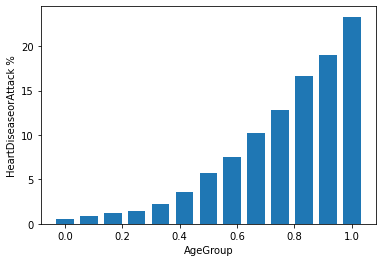

In [14]:
plotRelationshipContinious(df, 'BMI', 'HeartDiseaseorAttack', 30)
plotRelationshipContinious(df, 'AgeGroup', 'HeartDiseaseorAttack', 13)

# Results

* A clear relation between the values of the binary features and our target variable can be seen
* The influence BMI has on the target is unclear while the the AgeGroup has a big direct influence